In [1]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

--2021-10-13 06:25:37--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2021-10-13 06:25:38--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   117MB/s    in 

In [2]:
#ekstrak dataset
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
#melihat direktori dataset
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Queen', 'King', 'Rook', 'Knight', 'Bishop', 'Pawn']

In [4]:
#menghitung jumlah data pada tiap direktori
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))
print('total bishop images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Bishop')))
print('total queen images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Queen')))
print('total rook images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Rook')))

total pawn images : 107
total King images : 76
total Knight images : 106
total bishop images : 87
total queen images : 78
total rook images : 102


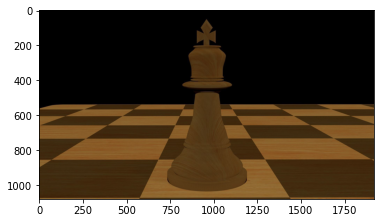

In [5]:
#melihat salah satu sample dataset
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

Augmentasi gambar untuk mengatasi jumlah dataset gambar yang kecil

In [6]:
#import image generator dan mengaplikasikan augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.1) #set validation split

In [7]:
#membagi data training dan data testing menggunakan parameter subset 'training'/'validation'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training'
) #set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, #direktori yang sama dengan data train
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)


Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


TRANSFER LEARNING MENGGUNAKAN RESNET 152V2

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model = tf.keras.models.Sequential([
    #parameter weights='imagenet', menggunakan model ResNet152V2 yang telah dilatih pada dataset imagenet
    #parameter include_top=False, layer output tidak memprediksi gambar dari dataset ResNet152V2 melainkan dataset cheesman
    #parameter input_tensor mengatur input
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.layers[0].trainable = False


234561536/234545216 [==============================] - 2s 0us/step


In [9]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 124s - loss: 8.0098 - accuracy: 0.4489 - val_loss: 2.3898 - val_accuracy: 0.5962
Epoch 2/50
63/63 - 112s - loss: 1.6920 - accuracy: 0.6673 - val_loss: 3.0352 - val_accuracy: 0.5385
Epoch 3/50
63/63 - 112s - loss: 1.2362 - accuracy: 0.7535 - val_loss: 0.9643 - val_accuracy: 0.7308
Epoch 4/50
63/63 - 112s - loss: 1.0901 - accuracy: 0.7735 - val_loss: 1.1386 - val_accuracy: 0.6923
Epoch 5/50
63/63 - 112s - loss: 0.9968 - accuracy: 0.8156 - val_loss: 1.2963 - val_accuracy: 0.7692
Epoch 6/50
63/63 - 112s - loss: 0.9363 - accuracy: 0.8216 - val_loss: 1.7230 - val_accuracy: 0.6538
Epoch 7/50
63/63 - 112s - loss: 0.5910 - accuracy: 0.8477 - val_loss: 1.4373 - val_accuracy: 0.7115
Epoch 8/50
63/63 - 112s - loss: 0.7023 - accuracy: 0.8417 - val_loss: 1.6715 - val_accuracy: 0.6923
Epoch 9/50
63/63 - 112s - loss: 0.3588 - accuracy: 0.9098 - val_loss: 1.0469 - val_accuracy: 0.8654
Epoch 10/50
63/63 - 113s - loss: 0.3896 - accuracy: 0.8958 - val_loss: 1.3429 - val_accuracy: 0.7885

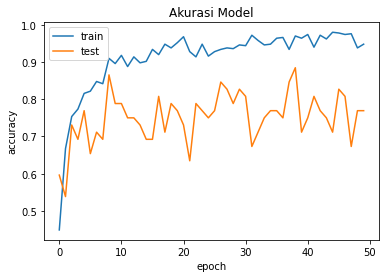

In [11]:
#plot akurasi
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

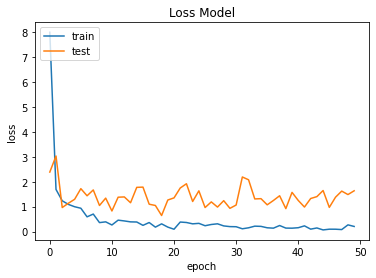

In [12]:
#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()